<a href="https://colab.research.google.com/github/akashkivani/almabetter-Online-Retail-Customer-Segmentation-Project/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Extraction/identification of major topics & themes discussed in news articles.**

**Problem Description**
In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# **Data Description**

**Attribute Information:**

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

0. Importing libs and data.

---



In [84]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import datetime as dt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/MyDrive/Data Science/AlmaBetter School/Capstone/Project 4/Data/Online Retail.xlsx')

Initial Data exploration

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
df.shape

(541909, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

The missing data can not with replaced with mean, median or mode, thus deciding to drop the rows ith missing values. As less than 50% of value is missing from column, thus not droppingf the column instead dropping the row. 

In [9]:
df.dropna(axis = 0 , inplace = True)

In [10]:
df.shape

(406829, 8)

In [11]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

No null value remains.

Descriptive Statistics:

---



In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


# 1. **Feature engineering.**

---



In [13]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

a. **Date time Stripping**

We already have InvoiceDate as datetime object. I am stripping them into year, month, day, hours to have a better analysis of costomer. 

In [14]:
df['Invoice_Year'] = df['InvoiceDate'].dt.year
df['Invoice_Month'] = df['InvoiceDate'].dt.strftime('%B') 
df['Invoice_Day'] = df['InvoiceDate'].dt.strftime('%A') 
df['Invoice_Hour'] = df['InvoiceDate'].dt.hour

#Printing data frame
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8


b. **Total amount**

Although I do have column on quantity and unit price, it is also important to understand the total amount spend by costomer. We can get that by multiplying unit price and quantity. 

In [15]:
df['Total_Amount'] = df['Quantity']*df['UnitPrice']

#printing new data frame
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_Hour,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34


In [16]:
df.shape

(406829, 13)

I have created 5 additional column. 

# 2. **EXPLORATORY DATA ANALYSIS**

---



My analysis in this section will contain columns containing numerical data. 

In [17]:
num_features= list(df.select_dtypes(['int64','float64']))

In [18]:
num_features

['Quantity',
 'UnitPrice',
 'CustomerID',
 'Invoice_Year',
 'Invoice_Hour',
 'Total_Amount']

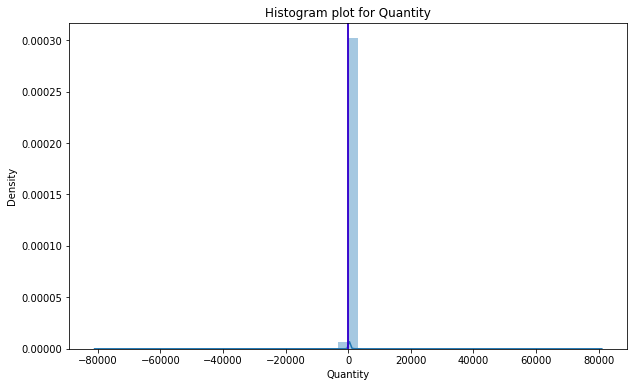

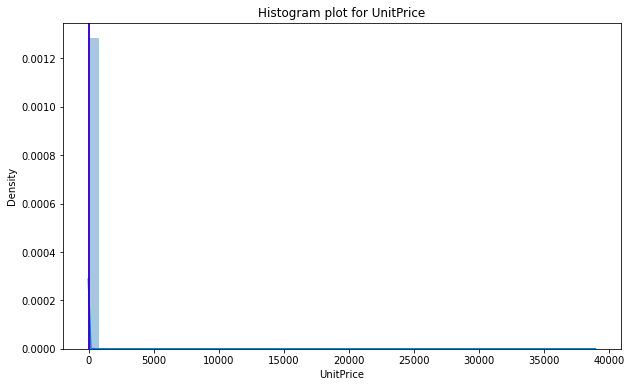

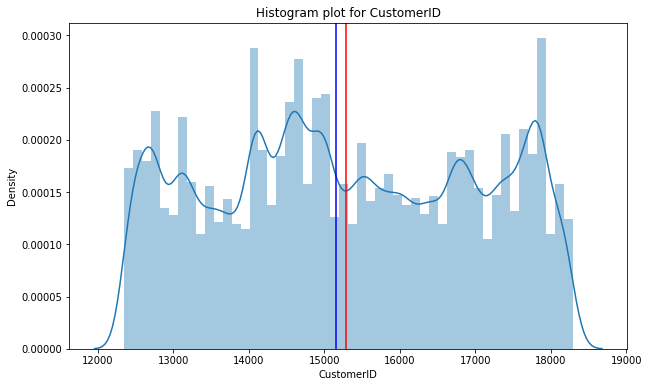

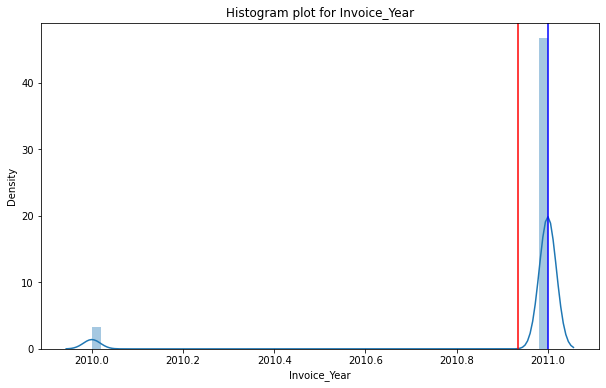

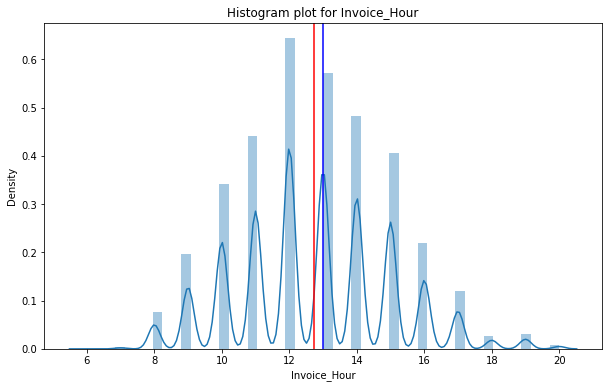

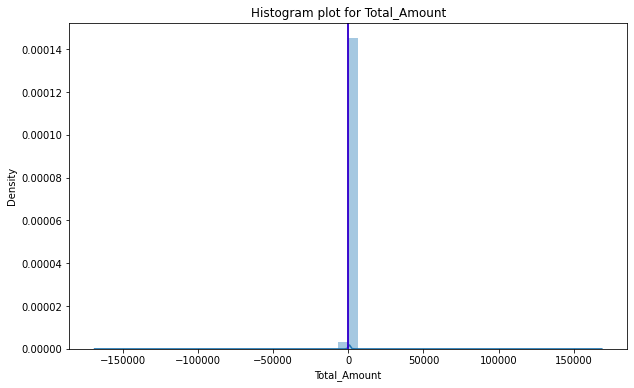

In [19]:
for col in num_features:
  fig = plt.figure(figsize = (10,6))
  ax = fig.gca()
  sns.distplot(df[col])
  feature = df[col]
  ax.axvline(feature.mean(), color= 'red')
  ax.axvline(feature.median(), color= 'Blue')
  ax.set_title(f'Histogram plot for {col}')

  plt.show()

**Top countries**

Countries relative to cosumer number. 

In [20]:
top_countries = pd.DataFrame(df['Country'].value_counts().sort_values(ascending = False).reset_index())
top_countries['Country cx %'] = top_countries['Country']*100/top_countries['Country'].count()
top_countries.rename(columns = {'index' : 'country','country':'Count of costomers'} , inplace = True)
top_countries.head(5)

,country,Country,Country cx %
0,United Kingdom,361878,978048.648649
1,Germany,9495,25662.162162
2,France,8491,22948.648649
3,EIRE,7485,20229.729730
4,Spain,2533,6845.945946


In [21]:
top_countries = pd.DataFrame(df['Country'].value_counts().sort_values(ascending = False).reset_index())
top_countries['Country %']= top_countries['Country']*100/df['Country'].count()
top_countries.rename(columns = {'index':'Country','Country':'Total Counts'},inplace = True)
top_countries.head(5)

,Country,Total Counts,Country %
0,United Kingdom,361878,88.950886
1,Germany,9495,2.333904
2,France,8491,2.087118
3,EIRE,7485,1.839839
4,Spain,2533,0.622620


Uk have the highest consumption, let's add a column to see the % of consumption. Also, changing column name. 

Text(0.5, 1.0, 'Country vs counts of CX')

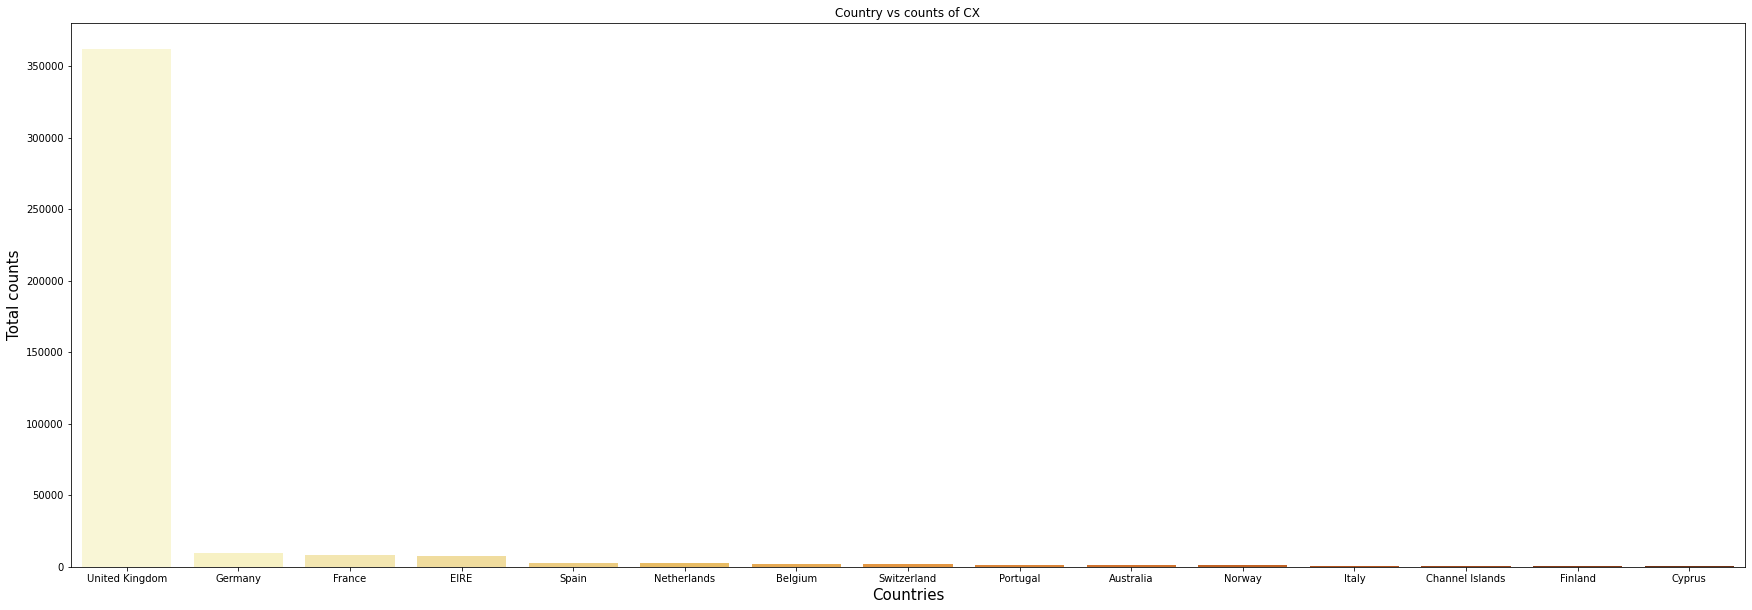

In [47]:
plt.figure(figsize= (30,10))
sns.barplot(x = 'Country' , y = 'Total Counts' , data = top_countries[:15] , palette=("YlOrBr")) #Setting it will 15 only as there are may country with very small counts. 
plt.xlabel('Countries' , size = 15)
plt.ylabel('Total counts' , size  = 15)
plt.title('Country vs counts of CX')

From the graph as well as table, UK have highest costomers, i.e. 88% of costomers are from UK. 
Germany, france, EIRE, spain are next in line. 

It makes sense as company is UK based. 

This data is only focusing on end of 2010 to end of 2011, i.e. 1 year. Thus, I am deciding not to plot year on year graph but will focus on monthly trend. 

**Monthly consumptions and top months**

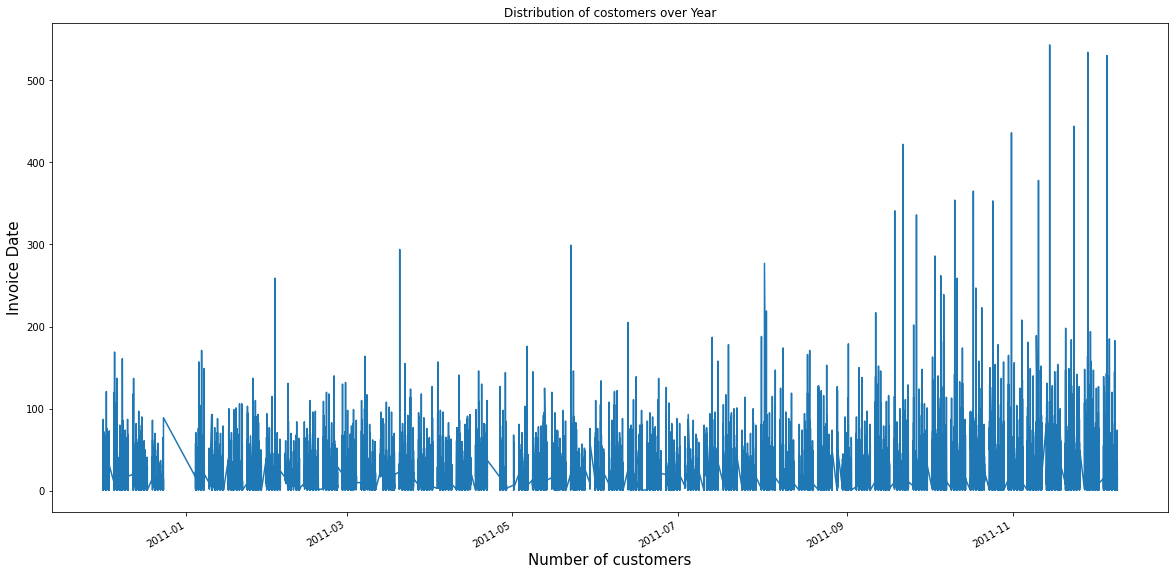

In [23]:
plt.figure(figsize=(20,10))

cx_dist = df.groupby('InvoiceDate').count()['CustomerID'].plot()
plt.title('Distribution of costomers over Year')
plt.xlabel('Number of customers' , size = 15)
plt.ylabel('Invoice Date', size = 15)
plt.show()

From the above graph, Sept. , Novemner seems to have much higher customers and the demand is increasing by the year end in November. 

The above graph is not clear for detailed analysis, thus creating bar plot for top months. 

In [31]:
# Making data frame. 

top_months_df = pd.DataFrame(df['Invoice_Month'].value_counts().sort_values(ascending = False).reset_index())
top_months_df.rename(columns = {'index' : 'Invoice_Month' , 'Invoice_Month' : 'Monthly Frequency' } , inplace = True)

top_months_df

,Invoice_Month,Monthly Frequency
0,November,65598
1,October,50695
2,December,44511
3,September,40822
4,May,28908
5,June,27836
6,March,27822
7,August,27662
8,July,27502
9,April,23198


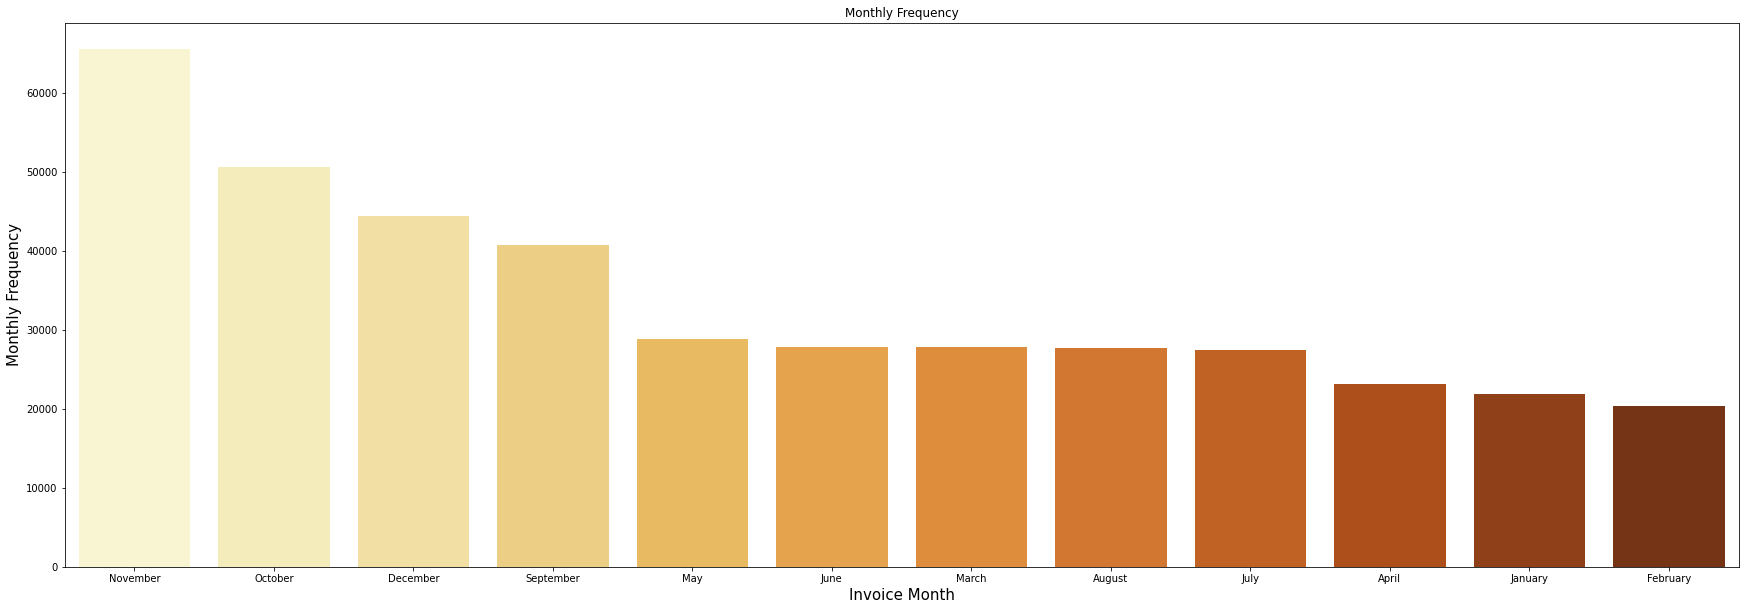

In [46]:
plt.figure(figsize = (30,10))

sns.barplot(x = 'Invoice_Month' , y = 'Monthly Frequency' , data = top_months_df , palette=("YlOrBr"))
plt.xlabel('Invoice Month' , size = 15)
plt.ylabel('Monthly Frequency' , size = 15)
plt.title('Monthly Frequency')

plt.show()

Acc. to graph and data frame above, November have highest demand, followed by Oct. , Dec.

**Top consumption by Days of week.** 

In [34]:
top_days_df = pd.DataFrame( df['Invoice_Day'].value_counts().sort_values(ascending = False).reset_index())
top_days_df.rename(columns = {'index' : 'Invoice Day' , 'Invoice_Day' : 'Frequency'} , inplace = True)

top_days_df

,Invoice Day,Frequency
0,Thursday,82374
1,Wednesday,70599
2,Tuesday,68110
3,Monday,66382
4,Sunday,63237
5,Friday,56127


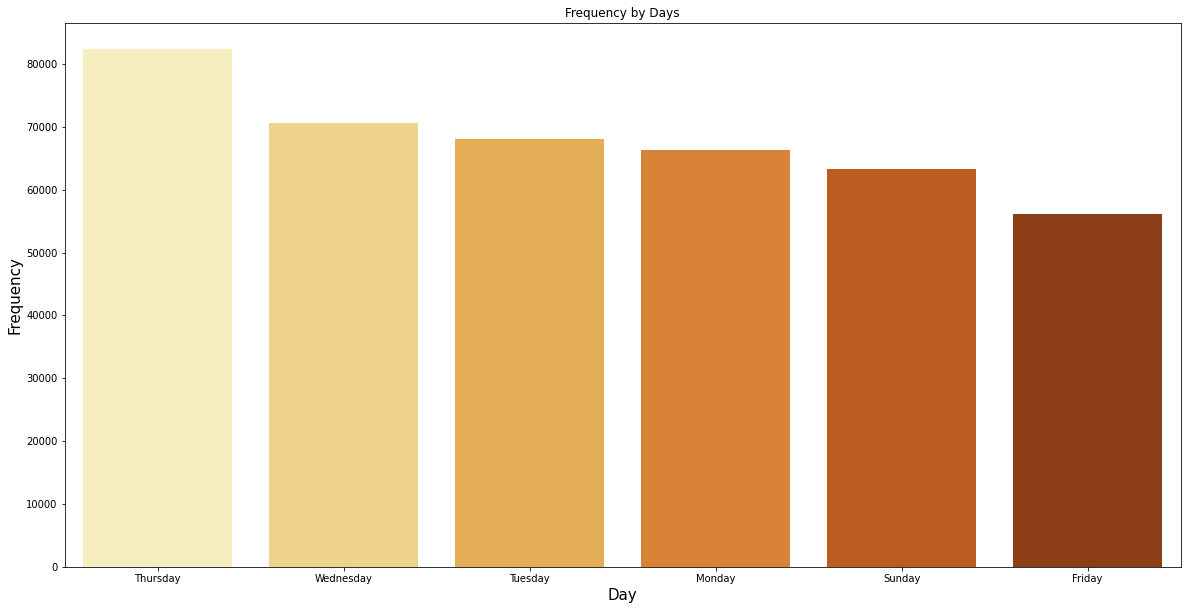

In [45]:
plt.figure(figsize=(20,10))

sns.barplot(x = 'Invoice Day' , y = 'Frequency' , data = top_days_df ,  palette=("YlOrBr"))
plt.xlabel('Day' , size = 15)
plt.ylabel('Frequency' , size = 15)
plt.title('Frequency by Days')

plt.show()

Thrusdays have highest demand, followed by wednesdays and tuesdays. Fridays have lowest demands. Saturdays do not seems like have any demands according to thus data set. 

**Consumption by Hour of day**

In [53]:
top_hrs_df = pd.DataFrame(df['Invoice_Hour'].value_counts().sort_values(ascending = False).reset_index())
top_hrs_df.rename(columns = {'index' : 'Invoice Hour' , 'Invoice_Hour': 'Frequency'}, inplace = True)

top_hrs_df

,Invoice Hour,Frequency
0,12,73342
1,13,65062
2,14,55075
3,11,50249
4,15,46220
5,10,38951
6,16,24997
7,9,22464
8,17,13734
9,8,8792


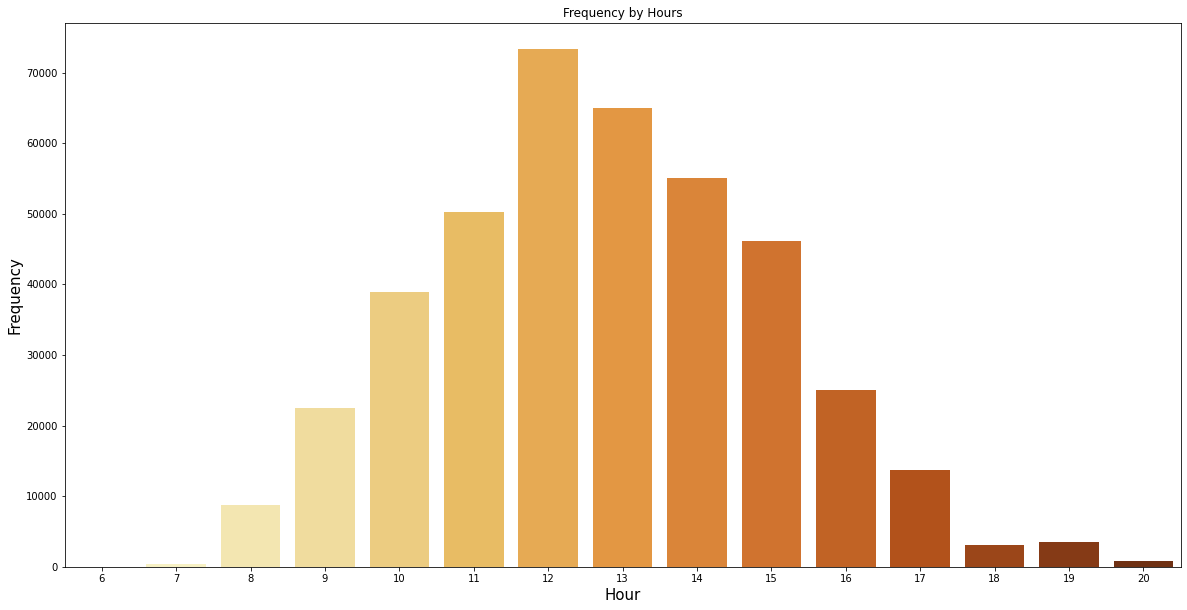

In [54]:
plt.figure(figsize=(20,10))

sns.barplot(x = 'Invoice Hour' , y = 'Frequency' , data = top_hrs_df ,  palette=("YlOrBr"))
plt.xlabel('Hour' , size = 15)
plt.ylabel('Frequency' , size = 15)
plt.title('Frequency by Hours')

plt.show()

12th Hour have the highest demand, followed by 13 and 14. 

**Top and bottom purchased product by product description.**

In [55]:
product_desc_df = pd.DataFrame(df['Description'].value_counts().sort_values(ascending = False).reset_index())
product_desc_df.rename(columns = {'index' : 'Description' , 'Description': 'Frequency'}, inplace = True)

product_desc_df

,Description,Frequency
0,WHITE HANGING HEART T-LIGHT HOLDER,2070
1,REGENCY CAKESTAND 3 TIER,1905
2,JUMBO BAG RED RETROSPOT,1662
3,ASSORTED COLOUR BIRD ORNAMENT,1418
4,PARTY BUNTING,1416
...,...,...
3891,NEW BAROQUE B'FLY NECKLACE CRYSTAL,1
3892,GLASS AND PAINTED BEADS BRACELET OL,1
3893,GLASS AND BEADS BRACELET IVORY,1
3894,CROCHET LILAC/RED BEAR KEYRING,1


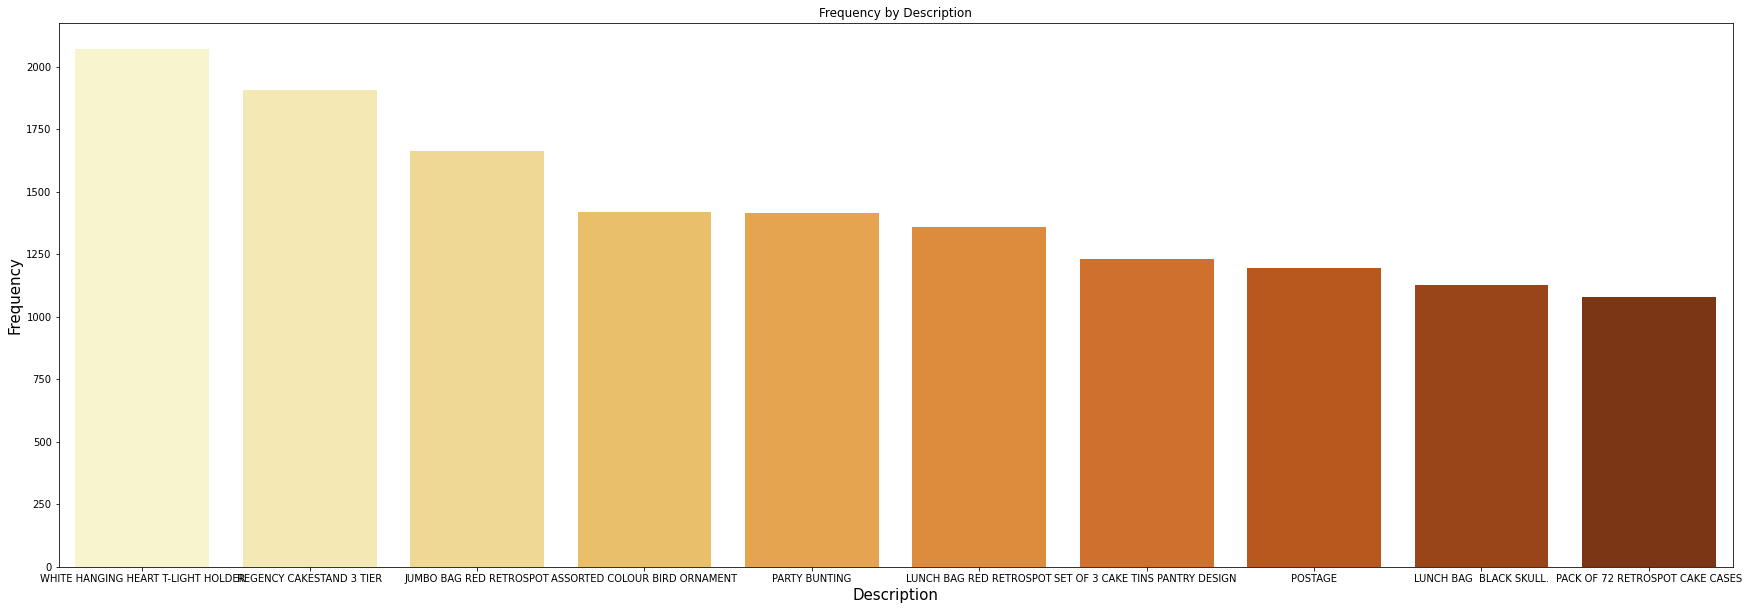

In [58]:
plt.figure(figsize=(30,10))

sns.barplot(x = 'Description' , y = 'Frequency' , data = product_desc_df[:10] ,  palette=("YlOrBr"))
plt.xlabel('Description' , size = 15)
plt.ylabel('Frequency' , size = 15)
plt.title('Frequency by Description')

plt.show()

**Total Amount**

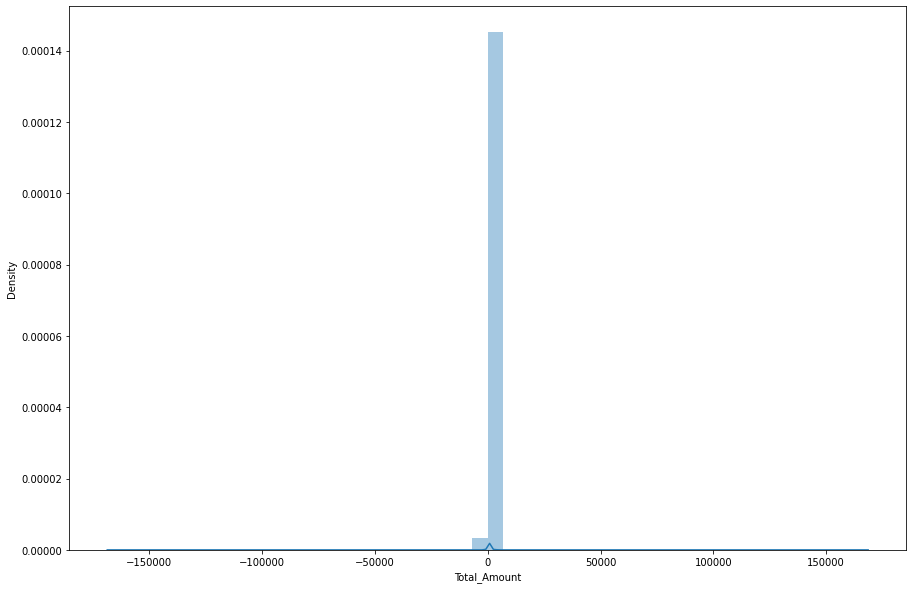

In [60]:
plt.figure(figsize = (15,10))
sns.distplot(df['Total_Amount'])

The graph is showing below 0 as well, which makes no sense. Removing it. 

In [62]:
total_amount_df = df[df['Total_Amount']>0]

Text(0.5, 1.0, 'Distribution of Total Amount')

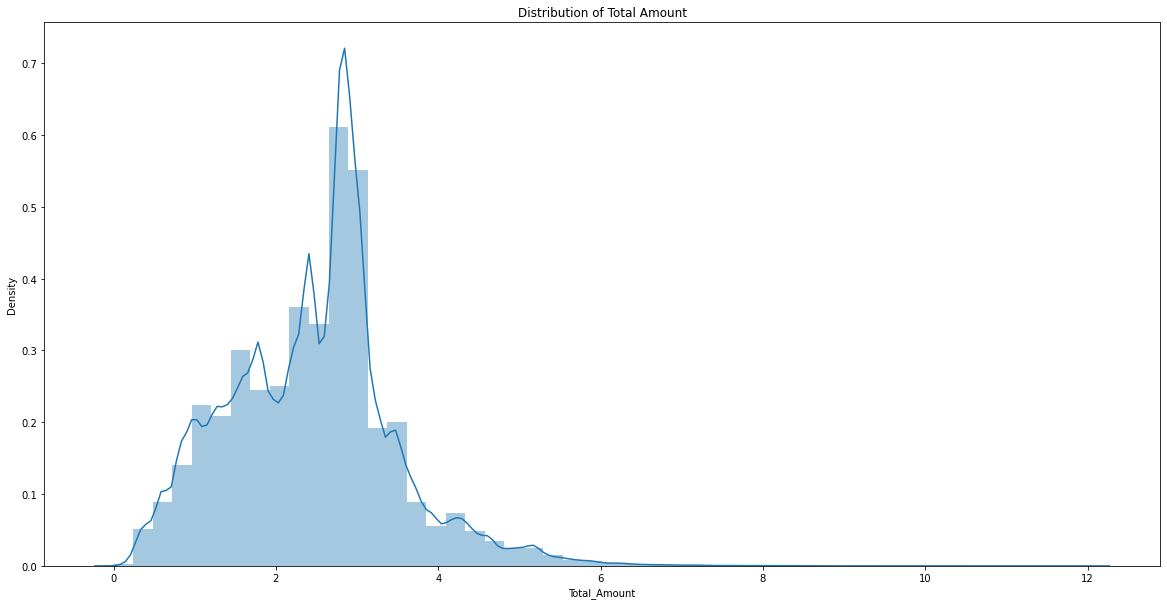

In [63]:
# Distribution of Total amounts
plt.figure(figsize = (20,10))
sns.distplot(np.log1p(total_amount_df['Total_Amount']))
plt.title('Distribution of Total Amount')

This is a right skewed distribution. 

Soem of the coustomers are placing a order and later cancelling it. It is technically bad for buisness, thus making a data on  how many customers are cancelling the orders. 

In [66]:
#Making a function to check if total amount is negative(means cancelled, thus loss for company)


def cancel_or_not(data):
  '''
  This function will check if the total amount is in negative which imply that the order was cancelled.
  '''
  if (data<0):
    return 'cancelled'
  
  else:
    return 'Not cancelled'

  return data

In [67]:
df_copy = df.copy()

In [68]:
df_copy['Cancelling_insight'] = df['Total_Amount'].apply(cancel_or_not)

In [75]:
cancellation_df = pd.DataFrame(df_copy.groupby('Cancelling_insight' , sort= False).agg({'CustomerID': 'count'}))
cancellation_df

,CustomerID
Cancelling_insight,
Not cancelled,397924
cancelled,8905


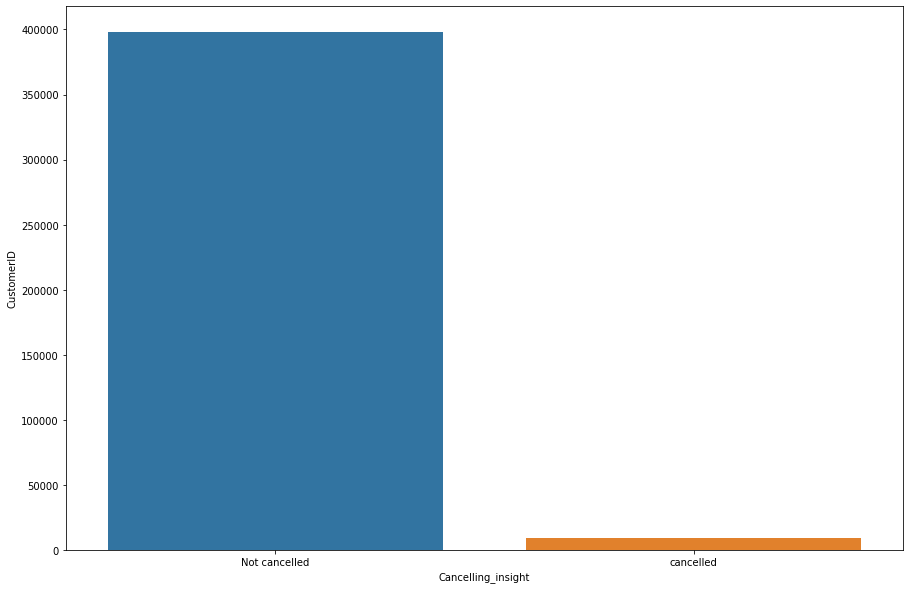

In [78]:
plt.figure(figsize = (15,10))

sns.barplot(x = cancellation_df.index , y = 'CustomerID' ,data = cancellation_df )


8905 of customers cancelled order which lead to some loss (-ve totdal amount).

# **Co-relation Matrix**

Text(0.5, 1.0, 'Corelation Matrix')

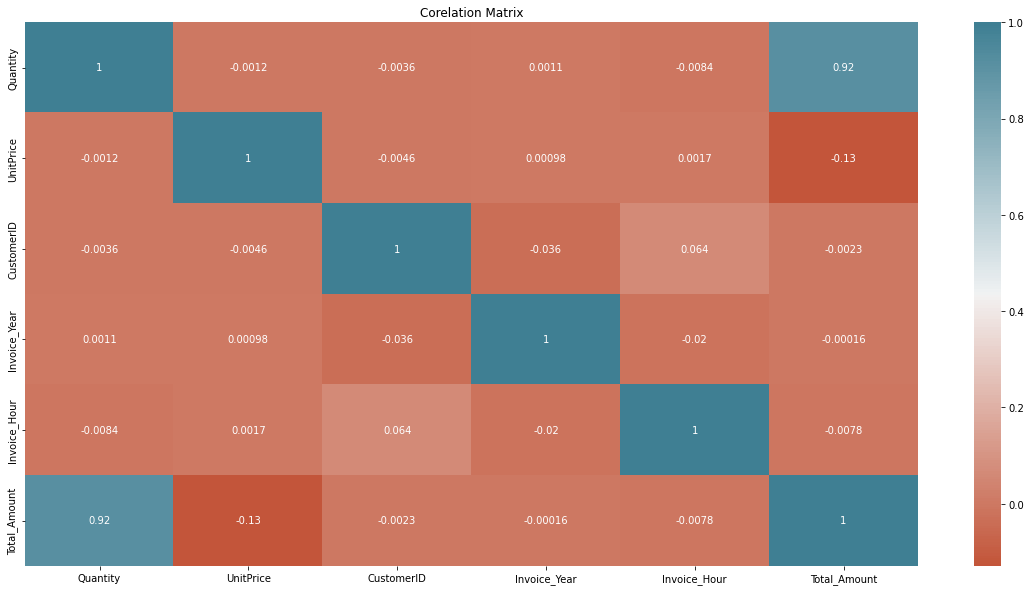

In [81]:
plt.figure(figsize = (20,10))

sns.heatmap(df.corr() , annot = True , cmap=sns.diverging_palette(20, 220, n=200))
plt.title('Corelation Matrix')

# **RFM Model (Recency, Frequency, Monetary Value)**



---
Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors.

**Recency**: How recently cx purchased.

**Frequency**: How often a customer makes a purchase.

**Monetary Value**: How much money a customer spends on.

Performing RFM Segmentation and RFM Analysis, Step by Step

The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer.

The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M).


---




In [85]:
# creating column for only date
df['Invoice_Date'] = df['InvoiceDate'].dt.date
snapshot_date = max(df.InvoiceDate) + dt.timedelta(days=1)
# Creating dataframe to record RFM score
RFM_df = df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'Total_Amount': 'sum'}).reset_index()
# Renaming columns
RFM_df.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'Total_Amount': 'MonetaryValue'}, inplace=True)

In [87]:
RFM_df.head(10)

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,326,2,0.00
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40
5,12352.0,36,95,1545.41
6,12353.0,204,4,89.00
7,12354.0,232,58,1079.40
8,12355.0,214,13,459.40
9,12356.0,23,59,2811.43


**Plots**

Text(0.5, 1.0, 'Recency Distribution Plot')

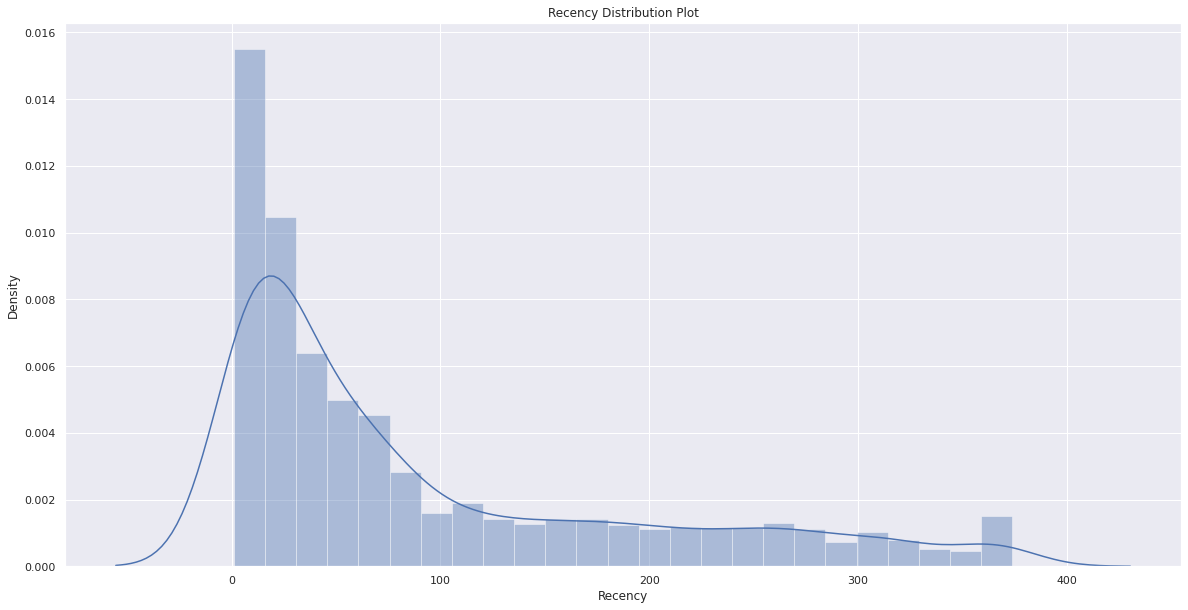

In [91]:
plt.figure(figsize = (20 , 10))
sns.distplot(RFM_df.Recency)
plt.title('Recency Distribution Plot')

Text(0.5, 1.0, 'Frequency Distribution Plot')

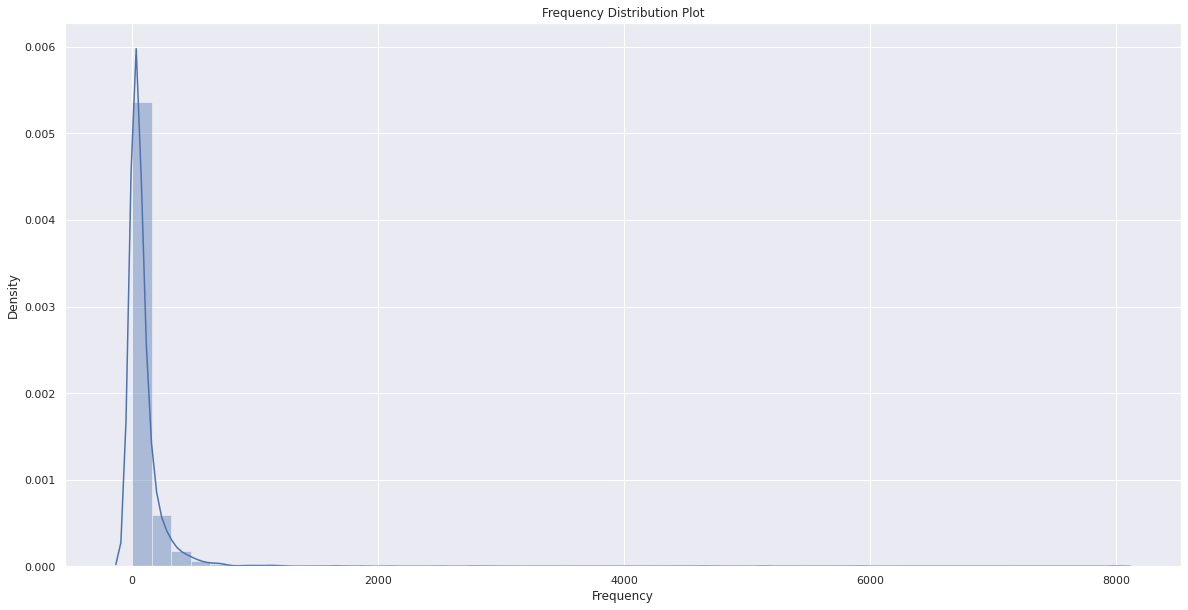

In [90]:
plt.figure(figsize = (20,10))
sns.distplot(RFM_df.Frequency)
plt.title('Frequency Distribution Plot')

Text(0.5, 1.0, 'Monetary Distribution Plot')

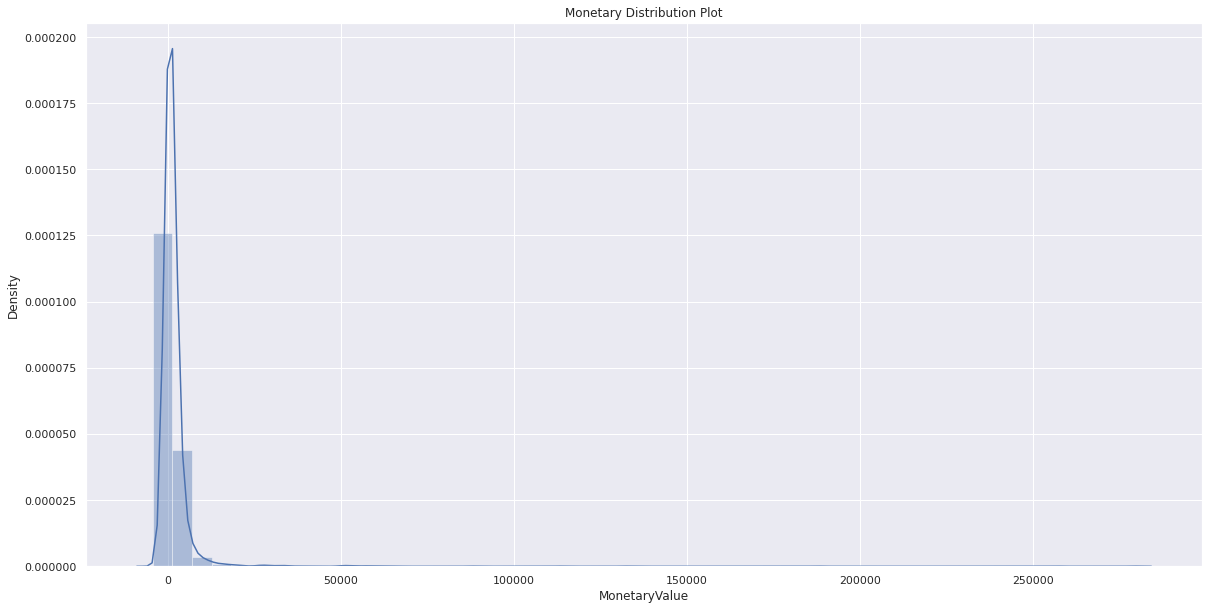

In [92]:
plt.figure(figsize = (20 , 10))
sns.distplot(RFM_df.MonetaryValue)
plt.title('Monetary Distribution Plot')

Checking of there is some corelation in this dataframe. 

Text(0.5, 1.0, 'Correlation among RFM')

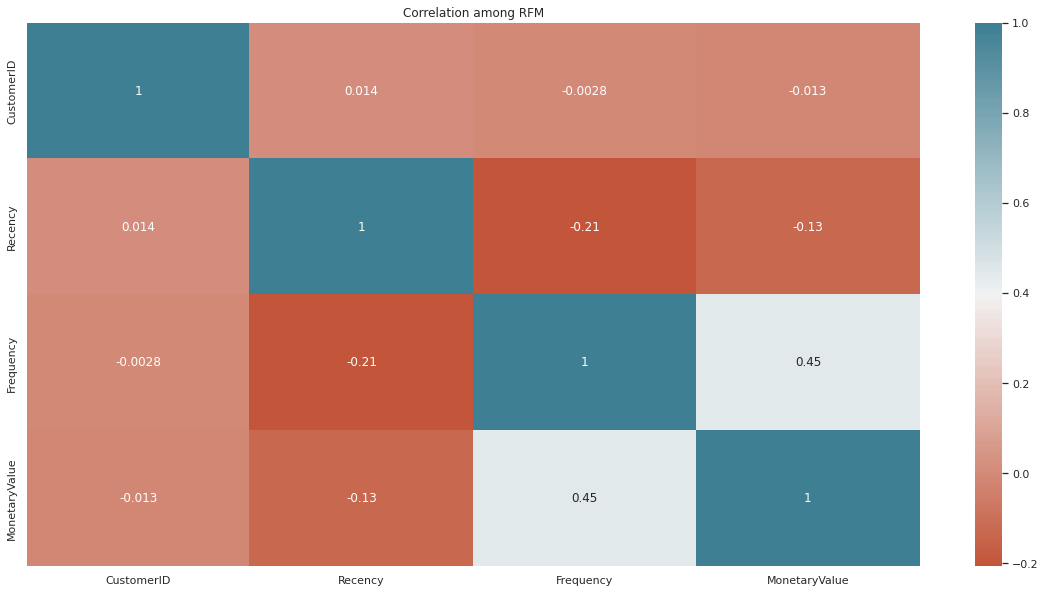

In [94]:
plt.figure(figsize = (20,10))
sns.heatmap(RFM_df.corr(), annot = True , cmap=sns.diverging_palette(20, 220, n=200))
plt.title('Correlation among RFM')